Redes neurais artificiais
=========================



## Introdução



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## Objetivo



Criar uma rede neural artificial usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### O neurônio artificial



Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."
        
        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p
            
        soma = soma + self.vies        
        dado_de_saida = soma.sig()                
        return dado_de_saida

Vamos fazer um teste simples do nosso neurônio artificial.



In [3]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada))

print(meu_neuronio(dados_de_entrada))

Valor(data=0.521522005958133)


### A camada de neurônios



Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



In [4]:
class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [5]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada))

[Valor(data=0.8637149353092213), Valor(data=0.018445466934327533), Valor(data=0.8956623164640114)]


### A rede neural Multilayer Perceptron (MLP)



Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP flui da esquerda para a direita, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP nunca retorna, apenas segue em frente. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



In [6]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [7]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [3, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.41244266526215906)


Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



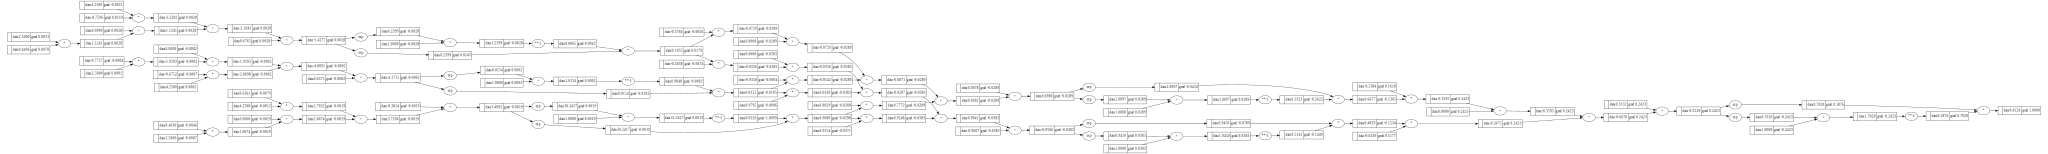

In [8]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

## Conclusão



A classe Neuronio foi projetada para criar neurônios individuais. Ela inicializa um neurônio com valores aleatórios para os pesos e o viés. Em seguida, possui um método de chamada (por exemplo, `__call__`) que recebe os valores de entrada e calcula o valor do neurônio, utilizando os métodos da classe Valor implementados anteriormente. Essa classe é responsável por realizar as operações de soma ponderada dos valores de entrada, adição do viés e aplicação da função de ativação, como a função sigmoide.

A classe Camadas permite a criação de camadas de neurônios. Ela recebe como entrada a quantidade de dados de entrada e o número de neurônios desejados para a camada. Ao instanciar a classe Camadas, ela cria uma lista iterável de neurônios individuais com base nos parâmetros fornecidos. Em seguida, a classe possui um método de chamada que recebe os valores de entrada e calcula o valor de cada neurônio da camada. Para isso, ele chama o método de chamada de cada neurônio individual e armazena os resultados em uma lista.

A classe MLP (Multilayer Perceptron) é responsável por criar uma rede neural mais complexa, empilhando camadas de neurônios. Ao instanciar a classe MLP, é necessário fornecer o número de camadas ocultas e o número de neurônios em cada camada. A classe cria uma sequência de camadas ocultas, utilizando a classe Camadas, e também define um método de saída para a rede neural.

Para treinar a rede neural, é necessário definir um objetivo e um conjunto de dados de treinamento. O processo de treinamento envolve o ajuste dos pesos e dos parâmetros da rede neural para minimizar uma função de perda ou erro. O algoritmo de backpropagation é comumente utilizado para realizar esse ajuste, calculando os gradientes dos pesos e propagando o erro de volta pela rede.

Durante o treinamento, os valores de entrada são alimentados para a rede neural, e os valores de saída são comparados com os valores desejados. Com base nessa comparação, os gradientes são calculados e os pesos e parâmetros da rede são atualizados de acordo com um algoritmo de otimização, como o gradiente descendente.

É importante ressaltar que, embora as classes Neuronio, Camadas e MLP forneçam a estrutura básica para a criação de uma rede neural, ainda há outros componentes e etapas envolvidos no processo de treinamento completo, como a escolha da função de perda, a definição das métricas de avaliação, a inicialização dos pesos, a regularização, entre outros.

Portanto, a implementação das classes mencionadas é apenas um primeiro passo para a criação de uma rede neural funcional e capaz de aprendizado. A partir dessas classes, é necessário desenvolver e incorporar outras funcionalidades para tornar a rede completa e adequada ao problema em questão.

## Playground

